In [10]:
import math
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

# Effect sizes

In [4]:
# mean height and sd for males
male_mean = 178
male_sd = 7.7

# generate a normal distribution for male heights 
male_height = scipy.stats.norm(male_mean, male_sd)

In [6]:
female_mean = 163
female_sd = 7.3
female_height = scipy.stats.norm(female_mean, female_sd)

## Evaluate the probability density function (PDF)

In [8]:
def evaluate_PDF(rv, x=4):
    '''Input: a random variable object, standard deviation
       output : x and y values for the normal distribution
       '''
    
    # Identify the mean and standard deviation of random variable 
    mean = rv.mean()
    std = rv.std()

    # Use numpy to calculate evenly spaced numbers over the specified interval (4 sd) and generate 100 samples.
    xs = np.linspace(mean - x*std, mean + x*std, 100)
    
    # Calculate the peak of normal distribution i.e. probability density. 
    ys = rv.pdf(xs)

    return xs, ys # Return calculated values

Text(0.5, 0, 'height (cm)')

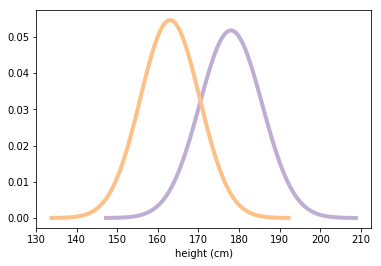

In [12]:
# male height
xs, ys = evaluate_PDF(male_height)
plt.plot(xs, ys, label='male', linewidth=4, color='#beaed4') 

# female height 
xs, ys = evaluate_PDF(female_height)
plt.plot(xs, ys, label='female', linewidth=4, color='#fdc086')

plt.xlabel('height (cm)')

## Un-standardized or Simple Effect Size Calculation

Difference by calculating the difference between distribution means

In [14]:
# male sample, mean, std
male_sample = male_height.rvs(1000)
mean1, std1 = male_sample.mean(), male_sample.std()
mean1, std1

(177.88116578522045, 8.00529690130816)

In [16]:
# female sample, mean, std
female_sample = female_height.rvs(1000)
mean2, std2 = female_sample.mean(), female_sample.std()
mean2, std2

(163.2461140564084, 7.587898162142064)

**Let's calculate the mean difference**

In [20]:
difference_in_means = male_sample.mean() - female_sample.mean()
difference_in_means # in cm

14.635051728812044

**Or %, but you'd need to choose which mean to express them relative to**

In [21]:
relative_difference = difference_in_means / male_sample.mean()
relative_difference * 100   # percent

8.2274318724012

In [23]:
relative_difference = difference_in_means / female_sample.mean()
relative_difference * 100

8.965023034946498

**Overlap threshold**

In [24]:
simple_thresh = (mean1 + mean2) / 2
simple_thresh

170.5636399208144

In [25]:
# a better, but slightly more complicated threshold is the place where the PDFs cross
thresh = (std1 * mean2 + std2 * mean1) / (std1 + std2)
thresh

170.36776434450115

In [28]:
# men below, women above the threshold
male_below_thresh = sum(male_sample < thresh)
female_above_thresh = sum(female_sample > thresh)
male_below_thresh, female_above_thresh

(176, 180)

Text(0.5, 0, 'height (cm)')

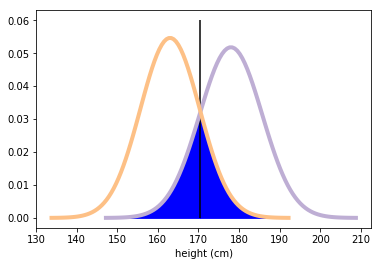

In [33]:
# male height
m_xs, male_ys = evaluate_PDF(male_height)
plt.plot(m_xs, male_ys, label='male', linewidth=4, color='#beaed4') 

# female height 
f_xs, female_ys = evaluate_PDF(female_height)
plt.plot(f_xs, female_ys, label='female', linewidth=4, color='#fdc086')
plt.vlines(thresh,ymin=0,ymax=0.06)
plt.fill_betweenx(male_ys,x1 = m_xs,x2=thresh, where = m_xs < thresh,color='b')
plt.fill_betweenx(female_ys,x1=f_xs,x2=thresh, where = f_xs > thresh,color='b')
plt.xlabel('height (cm)')

In [32]:
# calculate the overlap 
overlap = male_below_thresh / len(male_sample) + female_above_thresh / len(female_sample)

# fraction of people who would be misclassified if you tried to use height to guess sex
misclassification_rate = overlap / 2

overlap, misclassification_rate

(0.356, 0.178)

**Probability of superiority (Non-parametric)**

In [38]:
# probability man taller than woman
sum(x > y for x, y in zip(male_sample, female_sample)) / len(male_sample)

0.907

In [40]:
def overlap_superiority(group1, group2, n=1000):
    """Estimates overlap and superiority based on a sample.
    
    group1: scipy.stats rv object
    group2: scipy.stats rv object
    n: sample size
    """

    # Get a sample of size n from both groups
    group1_sample = group1.rvs(n)
    group2_sample = group2.rvs(n)
    
    # Identify the threshold between samples
    thresh = (group1.mean() + group2.mean()) / 2
    print(thresh)
    
    # Calculate no. of values above and below for group 1 and group 2 respectively
    above = sum(group1_sample < thresh)
    below = sum(group2_sample > thresh)
    
    # Calculate the overlap
    overlap = (above + below) / n
    
    # Calculate probability of superiority
    superiority = sum(x > y for x, y in zip(group1_sample, group2_sample)) / n

    return overlap, superiority

In [42]:
overlap_superiority(male_height, female_height, n=1000)

170.5


(0.326, 0.901)

## Standardized effect size

i.e. The mean height of males in USA is 1.4 standard deviations higher than mean female heights etc.

**Cohen's $d$**
> **$d$ = effect size (difference of means) / pooled standard deviation**

In [43]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [45]:
Cohen_d(male_sample, female_sample)

1.8764353664099407

**Interpreting $d$**
>**Small effect = 0.2**  
>**Medium Effect = 0.5**  
>**Large Effect = 0.8**

# T-test

1) Set up null and alternative hypotheses  
2) Choose a significance level  
3) Calculate the test statistic  
4) Determine the critical or p-value (find the rejection region)  
5) Compare t-value with critical t-value to accept or reject the Null hypothesis.

>** *"Acme Ltd. wants to improve sales performance. Past sales data indicate that the average sale was 100 dollars per transaction. After training the sales force, recent sales data (from a random sample of 25 salesmen) is shown below:"* **

       
      [122.09, 100.64, 125.77, 120.32, 118.25,  
        96.47, 111.4 ,  80.66, 110.77, 111.14, 
        102.9, 114.54,  88.09,  98.59,  87.07, 
       110.43, 101.9 , 123.89,  97.03, 116.23, 
        108.3, 112.82, 119.57, 131.38, 128.39]
        
* **The population mean ($\mu$).** Given as 100 (from past data).
* **The sample mean ($\bar{x}$).** Calculate from the sample data
* **The sample standard deviation ($s$).** Calculate from sample data
* **Number of observations($n$).** 25 as given in the question. This can also be calculated from the sample data.
* **Degrees of Freedom($df$).** Calculate from the sample as df = total no. of observations - 1

In [48]:
## Import the packages
import numpy as np
from scipy import stats 
import math

# For visualizing distributions - optional 
import seaborn as sns
import matplotlib.pyplot as plt
sample = np.array([122.09, 100.64, 125.77, 120.32, 118.25,  96.47, 111.4 , 80.66,
       110.77, 111.14, 102.9 , 114.54,  88.09,  98.59,  87.07, 110.43,
       101.9 , 123.89,  97.03, 116.23, 108.3 , 112.82, 119.57, 131.38,
       128.39])


# Population mean (μ)
mu = 100 

# Sample mean (x̄) using NumPy mean()
x_bar = sample.mean()

# Sample Stadrad Deviation (sigma) using Numpy
sigma = np.std(sample,ddof=1)

# Sample size (n)
n = len(sample)

# Degrees of Freedom
df = n-1

# Difference in sample mean 
diff = x_bar - mu


# Print the findings
print ('The sample contains', n, 'observations, having a mean of', x_bar, "and a standard deviation (sigma) = ", sigma, 
       ", with", df, 'degrees of freedom. The difference between sample and population means is:', diff)

# The sample contains 25 observations, having a mean of 109.5456 
# and a standard deviation (sigma) =  13.069276668584225 , 
# with 24 degrees of freedom. 
# The difference between sample and population means is: 9.54

The sample contains 25 observations, having a mean of 109.5456 and a standard deviation (sigma) =  13.338774643871902 , with 24 degrees of freedom. The difference between sample and population means is: 9.545599999999993


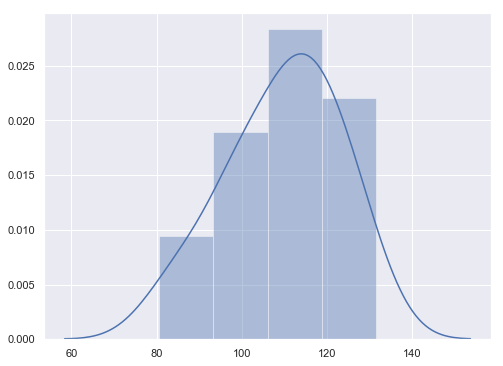

In [49]:
#check normality
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(sample)